In [1]:
import pandas as pd

In [2]:
f = open("문재인대통령취임연설문.txt", 'r')
lines = f.readlines()
f.close()

In [3]:
## Hannaum 한글 형태소 분석기 사용

In [4]:
from konlpy.tag import Hannanum

hannanum = Hannanum()

temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
temp[:1]

[['존경',
  '사랑',
  '국민',
  '여러분',
  '감사',
  '국민',
  '여러분',
  '위대한',
  '선택',
  '머리',
  '저',
  '오늘',
  '대한민국',
  '저',
  '19대',
  '대통령',
  '대한민국',
  '첫걸음',
  '저',
  '두',
  '어깨',
  '국민',
  '여러분',
  '부',
  '막중',
  '소명감',
  '저',
  '가슴',
  '한번',
  '경험',
  '나라',
  '열정',
  '저',
  '머리',
  '통합',
  '공존',
  '세상',
  '청사진']]

In [5]:
# 단어 리스트로 변환
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list=flatten(temp)
word_list[:1]

['존경']

In [6]:
# 두글자 이상인 단어만 추출
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
나라       6
국민들      6
역사       6
대통령의     5
세상       5
dtype: int64

In [7]:
from wordcloud import WordCloud
from collections import Counter

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

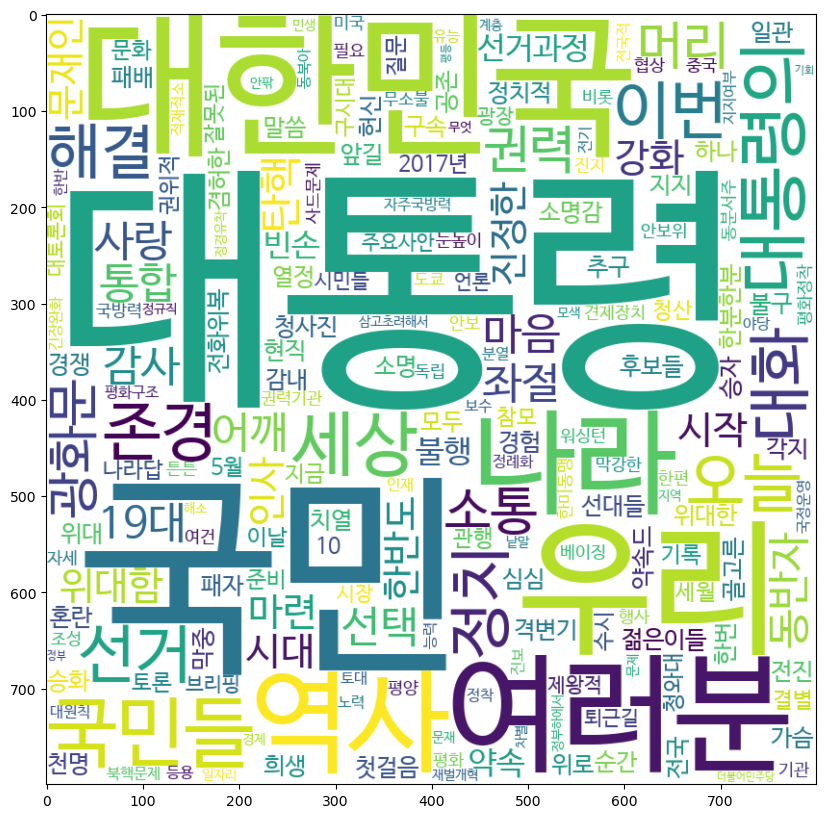

In [8]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

# 이미지 누끼 반영

### 이미지 누끼 따는 방법
* 포토샵 없이 적용
https://toptrend.blog/%EB%88%84%EB%81%BC-%EB%94%B0%EA%B8%B0-%EC%82%AC%EC%9D%B4%ED%8A%B8/
https://m.blog.naver.com/krc15601/221537268981

* 포토샵 적용 
https://blog.adobe.com/ko/publish/2022/02/16/adobe-photoshop-remove-a-background-with-help-from-ai
https://www.youtube.com/watch?v=4Qb0SE9Qwyk
https://www.youtube.com/watch?v=1UdGzNlO2Nw

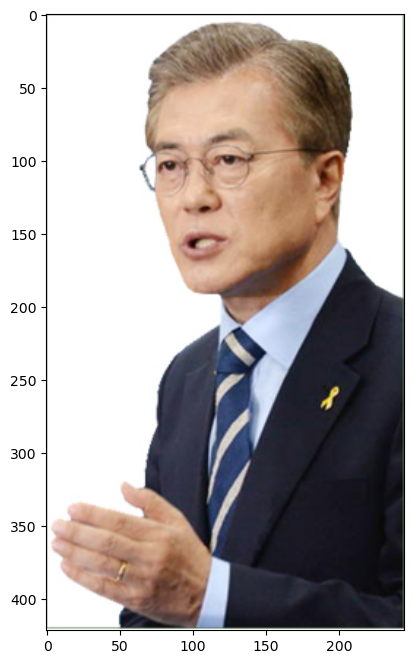

In [10]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

moon_mask=np.array(Image.open("문재인대통령.PNG"))

plt.figure(figsize=(8,8))
plt.imshow(moon_mask,interpolation="bilinear")
plt.show()

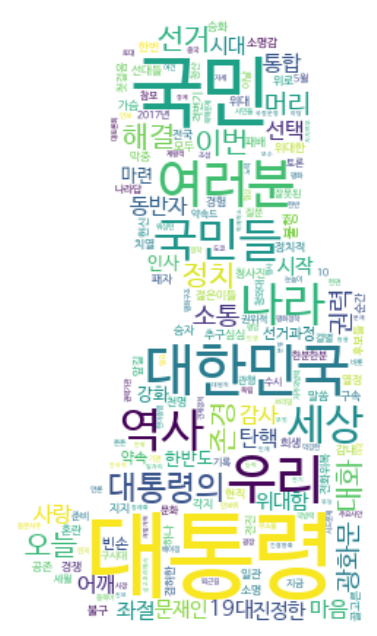

In [11]:
count = Counter(word_list)

wc_moon = WordCloud(
    font_path = font_path,
    mask=moon_mask,
    background_color="white"
)
wc_moon = wc_moon.generate_from_frequencies(count)

plt.figure(figsize=(8,8))
plt.imshow(wc_moon,interpolation="bilinear")
plt.axis("off")
plt.show()

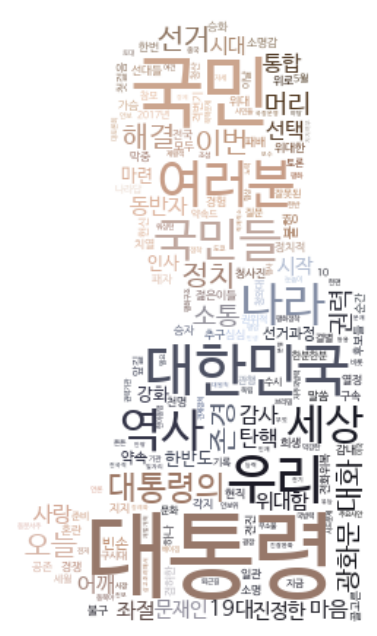

In [12]:
image_colors=ImageColorGenerator(moon_mask)

plt.figure(figsize=(8,8))
plt.imshow(wc_moon.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.show()